<a href="https://colab.research.google.com/github/ebel-frank/ai_ml_projects/blob/main/Keras_Sequential_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Simple Neural Network using Keras***

In [3]:
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense

Sales Prediction Model using Keras Sequential API

In [5]:
url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [ ]:
advertising_df.head()


,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [ ]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [ ]:
advertising_df.shape

(1199, 5)

In [ ]:
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

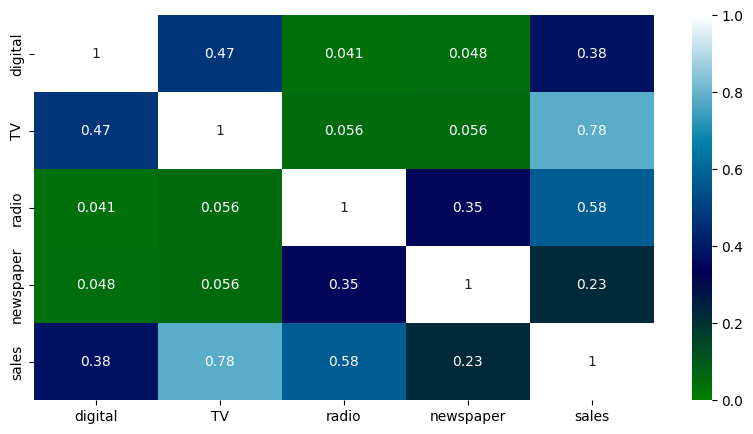

In [ ]:
## Plot the heatmap (Correlation Matrix) so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

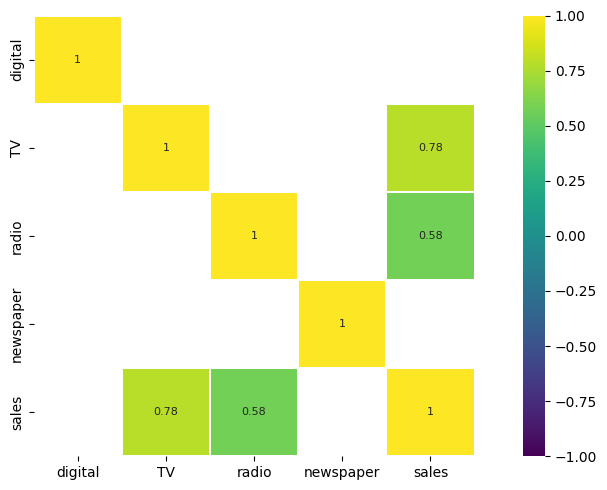

None

In [ ]:
#create a correlation matrix
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

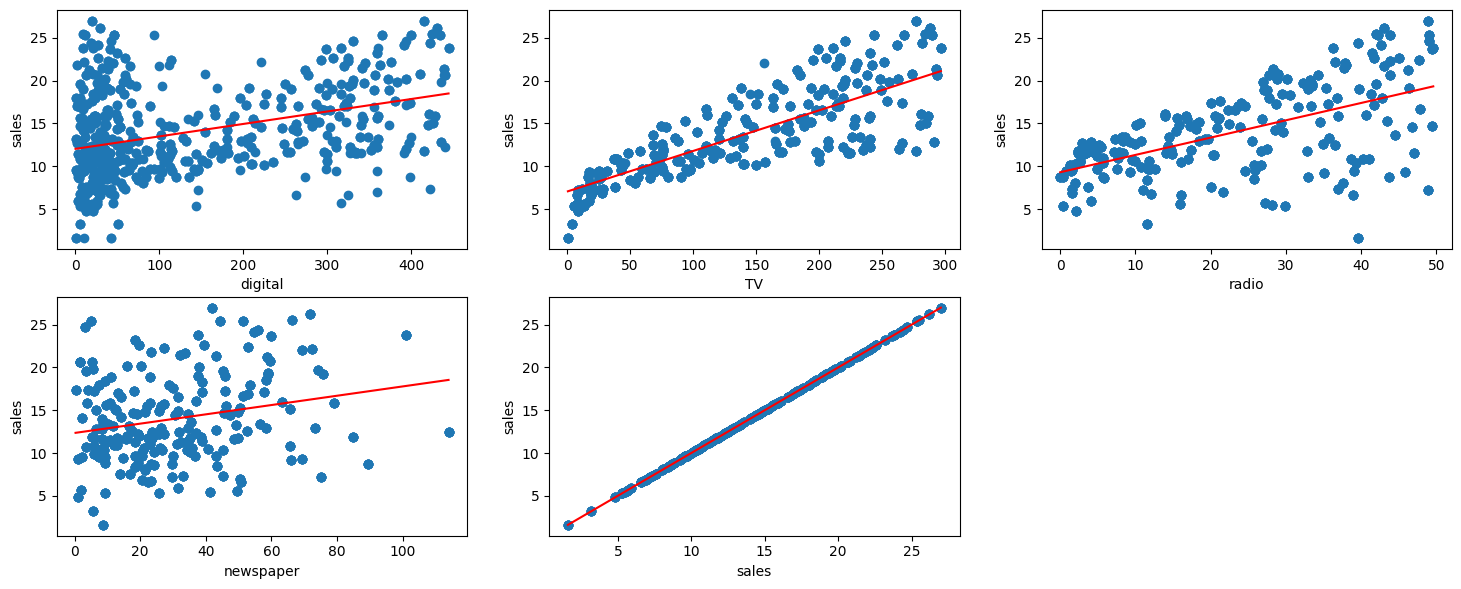

In [ ]:
'''=== Show the linear relationship between features  and sales Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns): #iterates over all columns
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label

# Training a Linear Regression Model

In [6]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [8]:
'''Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model '''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)

In [9]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(719, 4) (480, 4) (719,) (480,)


In [12]:
## Build model
model = Sequential(
    [
        Dense(4, activation="relu", name="inputLayer"),
        Dense(4, activation="relu", name="hiddenLayer0"),
        Dense(3, activation="relu", name="hiddenLayer1"),
        Dense(1, name="outputLayer"),
    ]
)

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

In [13]:
#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 50)
# print(len(normalized_X_train), X_train.shape)
# print(len(normalized_y_train), y_train.shape)
# print(len(normalized_X_test), X_test.shape)
# print(len(normalized_y_test), y_test.shape)

Epoch 1/50
23/23 [==============================] - 2s 29ms/step - loss: 216.5864 - mse: 216.5864 - val_loss: 228.2680 - val_mse: 228.2680
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 213.0262 - mse: 213.0262 - val_loss: 221.6737 - val_mse: 221.6737
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 203.6742 - mse: 203.6742 - val_loss: 206.6352 - val_mse: 206.6352
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 183.7612 - mse: 183.7612 - val_loss: 178.7456 - val_mse: 178.7456
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 148.6757 - mse: 148.6757 - val_loss: 119.6782 - val_mse: 119.6782
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 58.4550 - mse: 58.4550 - val_loss: 19.9283 - val_mse: 19.9283
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 18.3278 - mse: 18.3278 - val_loss: 14.7406 - val_mse: 14.7406
Epoch 8/50
23/23 [=======================

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 4)                 20        
                                                                 
 hiddenLayer0 (Dense)        (None, 4)                 20        
                                                                 
 hiddenLayer1 (Dense)        (None, 3)                 15        
                                                                 
 outputLayer (Dense)         (None, 1)                 4         
                                                                 
Total params: 59 (236.00 Byte)
Trainable params: 59 (236.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Visualisation

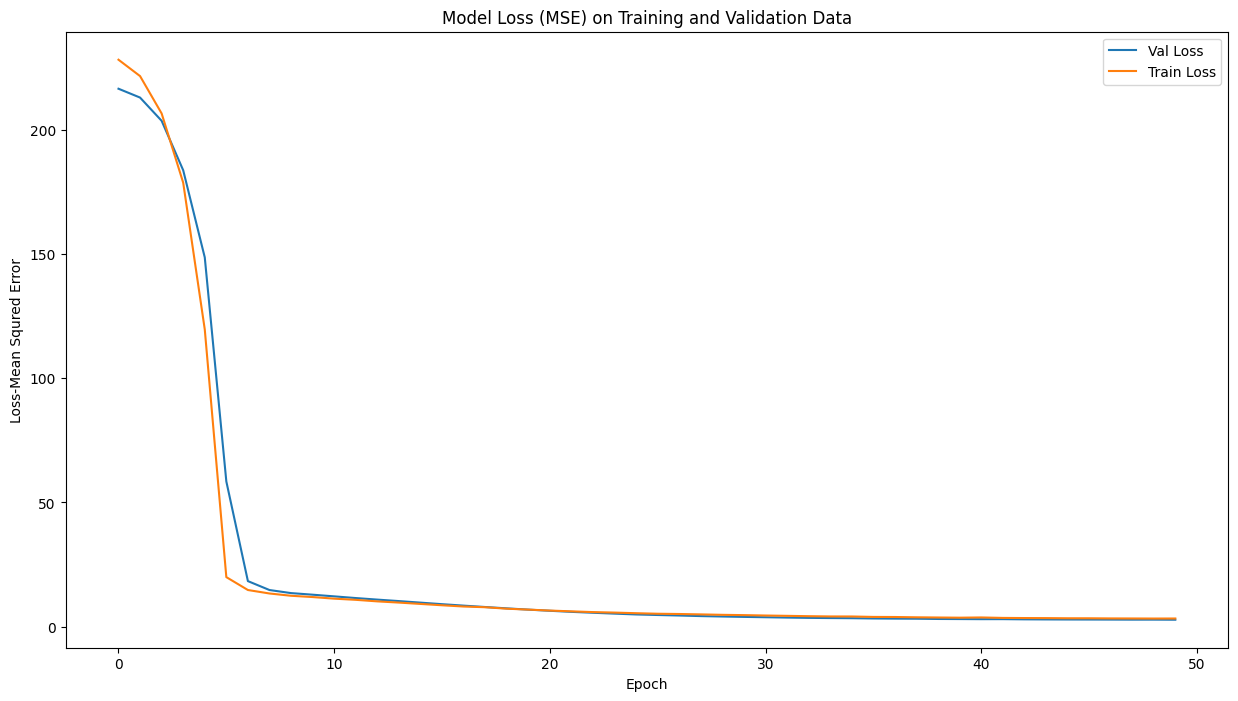

In [15]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

# Model Evaluation

In [16]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

23/23 [==============================] - 0s 2ms/step
1.6682698272694967
15/15 [==============================] - 0s 3ms/step
1.8080416293377661


23/23 [==============================] - 0s 2ms/step
5.193372283386687
15/15 [==============================] - 0s 2ms/step
4.980077787151532